<a href="https://colab.research.google.com/github/Jakelinecs/Tareas-Machine-Learning/blob/main/N13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# 1. データのロード
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
target_names = iris.target_names

# 2. 特徴量とカテゴリの選択 (versicolor: 1, virginica: 2)
# versicolor (1) と virginica (2) のデータのみを抽出
df_binary = df[df['target'].isin([1, 2])].copy()
# targetを 0 (versicolor) と 1 (virginica) に変換して2値分類用に調整
df_binary['target'] = df_binary['target'].replace({1: 0, 2: 1})

# 特徴量 (X) と正解値 (y) の選択
X_df = df_binary[['sepal length (cm)', 'petal length (cm)']]
y_df = df_binary['target']

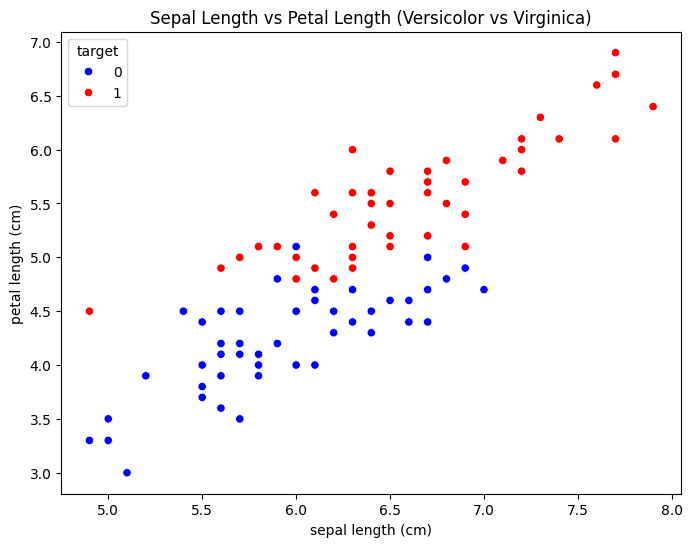

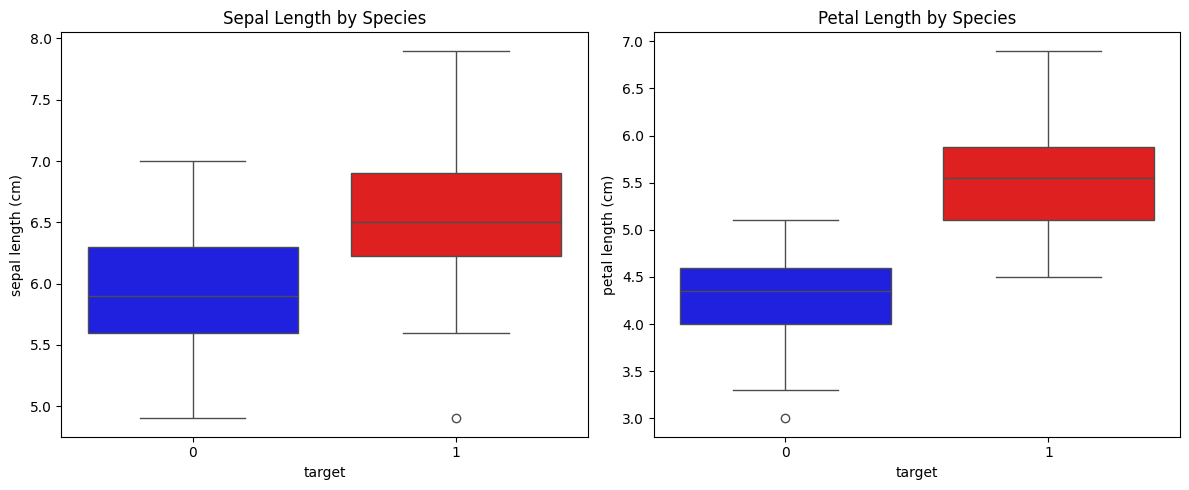

In [10]:
# 散布図
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='target',
                data=df_binary, palette={0: 'blue', 1: 'red'})
plt.title('Sepal Length vs Petal Length (Versicolor vs Virginica)')
plt.show()
#

df_binary['target'] = pd.to_numeric(df_binary['target'], errors='coerce')
df_binary['target'] = df_binary['target'].fillna(0).astype(int)

palette_colors = {0: 'blue', 1: 'red'}

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)

sns.boxplot(
    x='target',
    y='sepal length (cm)',
    data=df_binary,
    palette=palette_colors,
    hue='target',
    legend=False
)
plt.title('Sepal Length by Species')

plt.subplot(1, 2, 2)
sns.boxplot(
    x='target',
    y='petal length (cm)',
    data=df_binary,
    palette=palette_colors,
    hue='target',
    legend=False
)
plt.title('Petal Length by Species')

plt.tight_layout()
plt.show()


In [11]:
from sklearn.model_selection import train_test_split

# Pandas DataFrameからNumPy ndarrayへの変換
X = X_df.values
y = y_df.values

# 75%を訓練用、25%を検証用として分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(f"訓練データ形状: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"検証データ形状: X_test={X_test.shape}, y_test={y_test.shape}")

訓練データ形状: X_train=(75, 2), y_train=(75,)
検証データ形状: X_test=(25, 2), y_test=(25,)


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 訓練データのみで fit（平均と標準偏差を学習）
X_train_scaled = scaler.fit_transform(X_train)

# 訓練データと検証データに transform（学習した平均と標準偏差を適用）
X_test_scaled = scaler.transform(X_test)

# 以降は標準化されたデータを使用
X_train = X_train_scaled
X_test = X_test_scaled

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# n_neighbors (K) を 5 に設定
knn = KNeighborsClassifier(n_neighbors=5)

# 学習
knn.fit(X_train, y_train)

# 推定
y_pred_knn = knn.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# 1. 混同行列
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("--- 混同行列 (Confusion Matrix) ---")
print(cm_knn)

# 2. 各種指標の計算
acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
rec_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("\n--- 評価指標 ---")
print(f"正解率 (Accuracy): {acc_knn:.4f}")   # 全体の予測のうち、正しく分類された割合
print(f"適合率 (Precision): {prec_knn:.4f}") # 陽性と予測されたもののうち、実際に陽性だった割合
print(f"再現率 (Recall): {rec_knn:.4f}")     # 実際に陽性であるもののうち、陽性と予測された割合
print(f"F値 (F1-score): {f1_knn:.4f}")       # 適合率と再現率の調和平均

--- 混同行列 (Confusion Matrix) ---
[[10  3]
 [ 0 12]]

--- 評価指標 ---
正解率 (Accuracy): 0.8800
適合率 (Precision): 0.8000
再現率 (Recall): 1.0000
F値 (F1-score): 0.8889


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36817 (\N{CJK UNIFIED IDEOGRAPH-8FD1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20621 (\N{CJK UNIFIED IDEOGRAPH-508D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

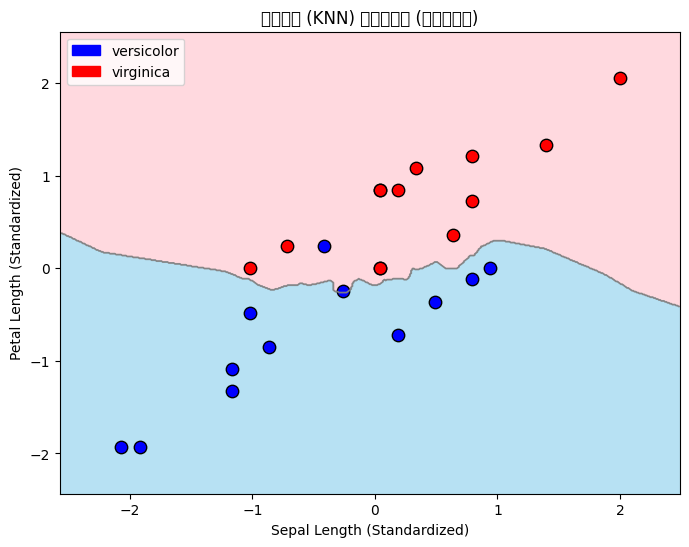

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# decision_region 関数を再定義 (ここでは省略し、直接実行)

def decision_region(X, y, model, step=0.01, title='決定領域', xlabel='横軸', ylabel='縦軸', target_names=['versicolor', 'virginica']):
    # ... (関数の定義は省略)
    scatter_color = ['blue', 'red'] # 順序をtarget=0, 1に合わせる
    contourf_color = ['skyblue', 'pink']
    n_class = 2

    # データ範囲を拡張してメッシュを作成
    X_min, X_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    Y_min, Y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(X_min, X_max, step), np.arange(Y_min, Y_max, step))

    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # 決定領域の塗りつぶし
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color), alpha=0.6)

    # 決定境界線
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='gray', linewidths=1, alpha=0.8)

    # 散布図
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i],
                    label=target_names[i], marker='o', edgecolors='k')

    # 凡例
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.show()

# 最近傍法の決定領域可視化
decision_region(X_test, y_test, knn,
                title='最近傍法 (KNN) の決定領域 (検証データ)',
                xlabel='Sepal Length (Standardized)',
                ylabel='Petal Length (Standardized)')
#

--- 各手法の学習と評価 ---


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36817 (\N{CJK UNIFIED IDEOGRAPH-8FD1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20621 (\N{CJK UNIFIED IDEOGRAPH-508D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

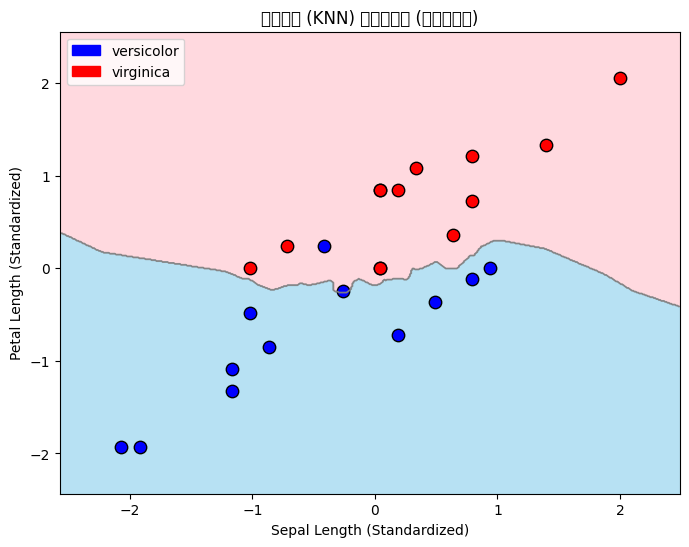

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12525 (\N{KATAKANA LETTER RO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12472 (\N{KATAKANA LETTER ZI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12486 (\N{KATAKANA LETTER TE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12451 (\N{KATAKANA LETTER SMALL I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

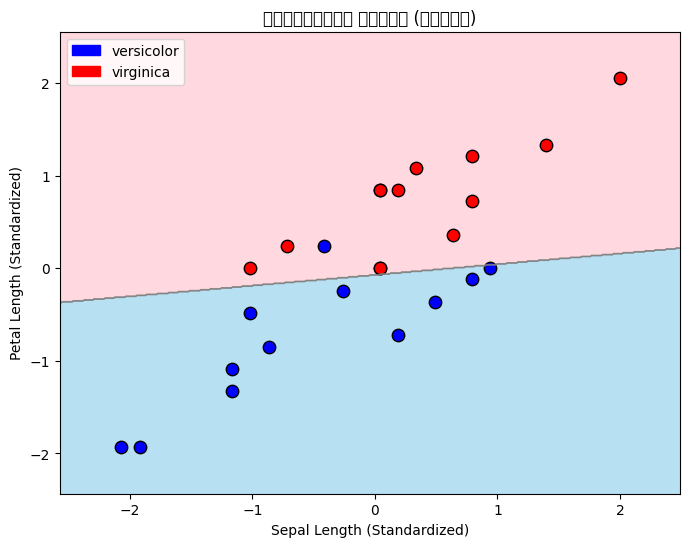

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32218 (\N{CJK UNIFIED IDEOGRAPH-7DDA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24418 (\N{CJK UNIFIED IDEOGRAPH-5F62}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27770 (\N{CJK UNIFIED IDEOGRAPH-6C7A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23450 (\N{CJK UNIFIED IDEOGRAPH-5B9A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

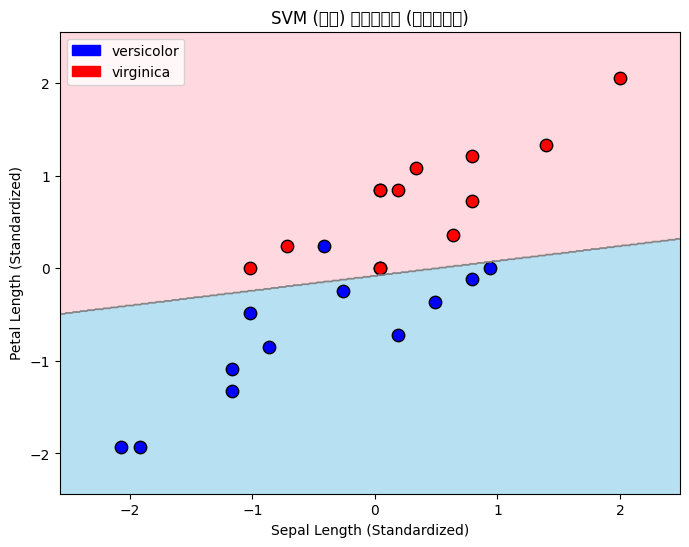

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27770 (\N{CJK UNIFIED IDEOGRAPH-6C7A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23450 (\N{CJK UNIFIED IDEOGRAPH-5B9A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26408 (\N{CJK UNIFIED IDEOGRAPH-6728}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38936 (\N{CJK UNIFIED IDEOGRAPH-9818}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

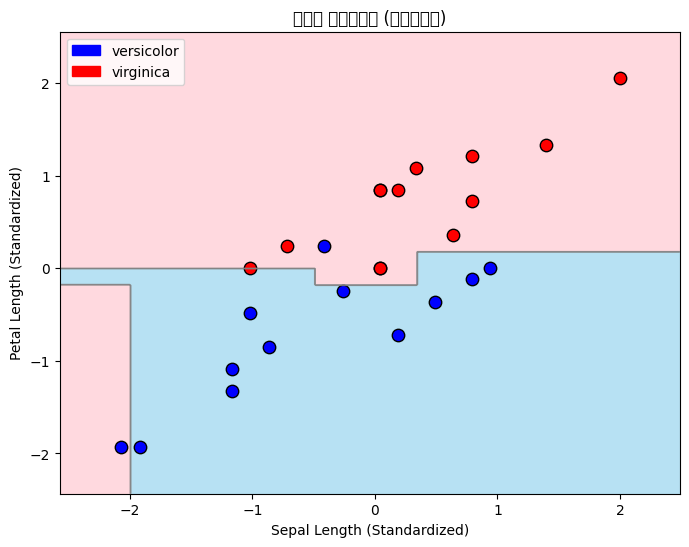

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12480 (\N{KATAKANA LETTER DA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12512 (\N{KATAKANA LETTER MU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12501 (\N{KATAKANA LETTER HU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/

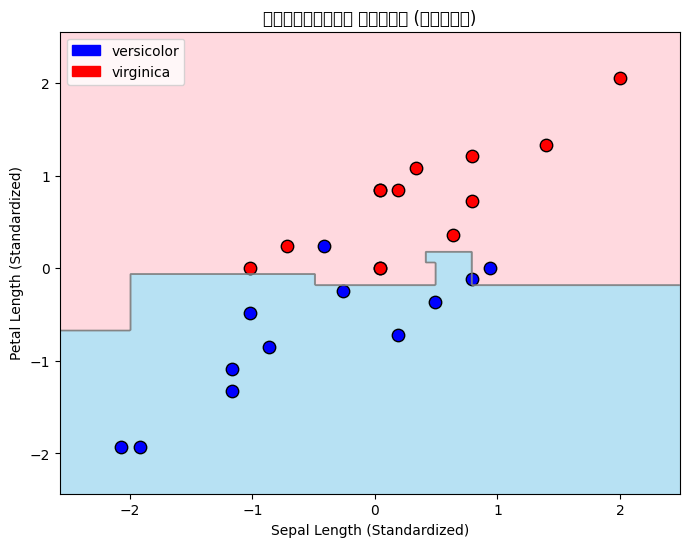


--- 標準化済みデータによる二値分類結果 ---
           Accuracy Precision  Recall F1-score
最近傍法 (KNN)    88.0%     80.0%  100.0%   88.89%
ロジスティック回帰     92.0%    85.71%  100.0%   92.31%
SVM (線形)      92.0%    85.71%  100.0%   92.31%
決定木           88.0%     80.0%  100.0%   88.89%
ランダムフォレスト     88.0%     80.0%  100.0%   88.89%


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# モデルのインスタンス化
models = {
    '最近傍法 (KNN)': KNeighborsClassifier(n_neighbors=5),
    'ロジスティック回帰': LogisticRegression(random_state=0),
    'SVM (線形)': SVC(kernel='linear', random_state=0),
    '決定木': DecisionTreeClassifier(random_state=0),
    'ランダムフォレスト': RandomForestClassifier(random_state=0),
}

results = {}

print("--- 各手法の学習と評価 ---")
for name, model in models.items():
    # 学習
    model.fit(X_train, y_train)

    # 推定
    y_pred = model.predict(X_test)

    # 評価
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-score': f1}

    # 決定領域の可視化
    decision_region(X_test, y_test, model,
                    title=f'{name} の決定領域 (検証データ)',
                    xlabel='Sepal Length (Standardized)',
                    ylabel='Petal Length (Standardized)')

# 結果を表にまとめる
df_results = pd.DataFrame(results).T
df_results = (df_results * 100).round(2).astype(str) + '%'
print("\n--- 標準化済みデータによる二値分類結果 ---")
print(df_results)

In [17]:
# 標準化なしでデータを分割（再実行）
X_train_no_scale, X_test_no_scale, y_train_no_scale, y_test_no_scale = train_test_split(
    X_df.values, y_df.values, test_size=0.25, random_state=0
)

# ロジスティック回帰を標準化なしで実行
lr_no_scale = LogisticRegression(random_state=0)
lr_no_scale.fit(X_train_no_scale, y_train_no_scale)
y_pred_no_scale = lr_no_scale.predict(X_test_no_scale)
acc_no_scale = accuracy_score(y_test_no_scale, y_pred_no_scale)

# 標準化ありの結果と比較
acc_scale = results['ロジスティック回帰']['Accuracy'] # 標準化あり

print("\n--- 標準化の有無の比較 (ロジスティック回帰) ---")
print(f"標準化あり 正解率: {acc_scale:.4f}")
print(f"標準化なし 正解率: {acc_no_scale:.4f}")


--- 標準化の有無の比較 (ロジスティック回帰) ---
標準化あり 正解率: 0.9200
標準化なし 正解率: 0.8800


In [18]:
from sklearn.metrics import classification_report

# 1. 全データセットを使用
X_all = iris.data # 全4特徴量
y_all = iris.target # 全3クラス (0, 1, 2)

# 2. データの分割と標準化
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.25, random_state=0)

scaler_all = StandardScaler()
X_train_all = scaler_all.fit_transform(X_train_all)
X_test_all = scaler_all.transform(X_test_all)

# 3. 各手法の実行と評価
multi_results = {}
multi_models = {
    '最近傍法 (KNN)': KNeighborsClassifier(n_neighbors=5),
    'SVM (RBF)': SVC(kernel='rbf', random_state=0), # 多値分類ではRBFカーネルを試す
    'ランダムフォレスト': RandomForestClassifier(random_state=0),
}

print("\n--- 全3種類による多値分類結果 (全4特徴量, 標準化済み) ---")
for name, model in multi_models.items():
    model.fit(X_train_all, y_train_all)
    y_pred_all = model.predict(X_test_all)

    # 正解率
    acc = accuracy_score(y_test_all, y_pred_all)

    # 多値分類の総合評価レポート (Precision, Recall, F1-scoreはクラスごとに算出される)
    report = classification_report(y_test_all, y_pred_all, target_names=target_names, output_dict=True)

    multi_results[name] = {'Accuracy': f'{acc:.4f}', 'Macro Avg F1': f'{report["macro avg"]["f1-score"]:.4f}'}

    print(f"**{name}**")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test_all, y_pred_all, target_names=target_names))

df_multi_results = pd.DataFrame(multi_results).T
print("\n--- 多値分類 最終比較表 ---")
print(df_multi_results)


--- 全3種類による多値分類結果 (全4特徴量, 標準化済み) ---
**最近傍法 (KNN)**
Accuracy: 0.9737
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

**SVM (RBF)**
Accuracy: 0.9737
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

**ランダムフォレスト**
Accuracy: 0.9737
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        